In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [180]:
25/100

0.25

In [181]:
data = pd.read_excel("kawa.xlsx", index_col='lp.', nrows=25, usecols=['lp.', 'GM', 'T', 'Bartek', 'Krzysiek', 'Amelia', 'Ola', 'Nadia', 'Przemek'])

cols = ['Bartek', 'Krzysiek', 'Amelia', 'Nadia', 'Ola', 'Przemek']

column_means = data.mean()
# fill rows with NaNs only with -1
rows_all_nan = data[cols].isnull().all(axis=1)
data.loc[rows_all_nan, cols] = -1
# fill left NaNs with mean of each column
data.fillna(column_means, inplace=True)

data[cols] = (data[cols] - data[cols].min())/(data[cols].max() - data[cols].min())

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

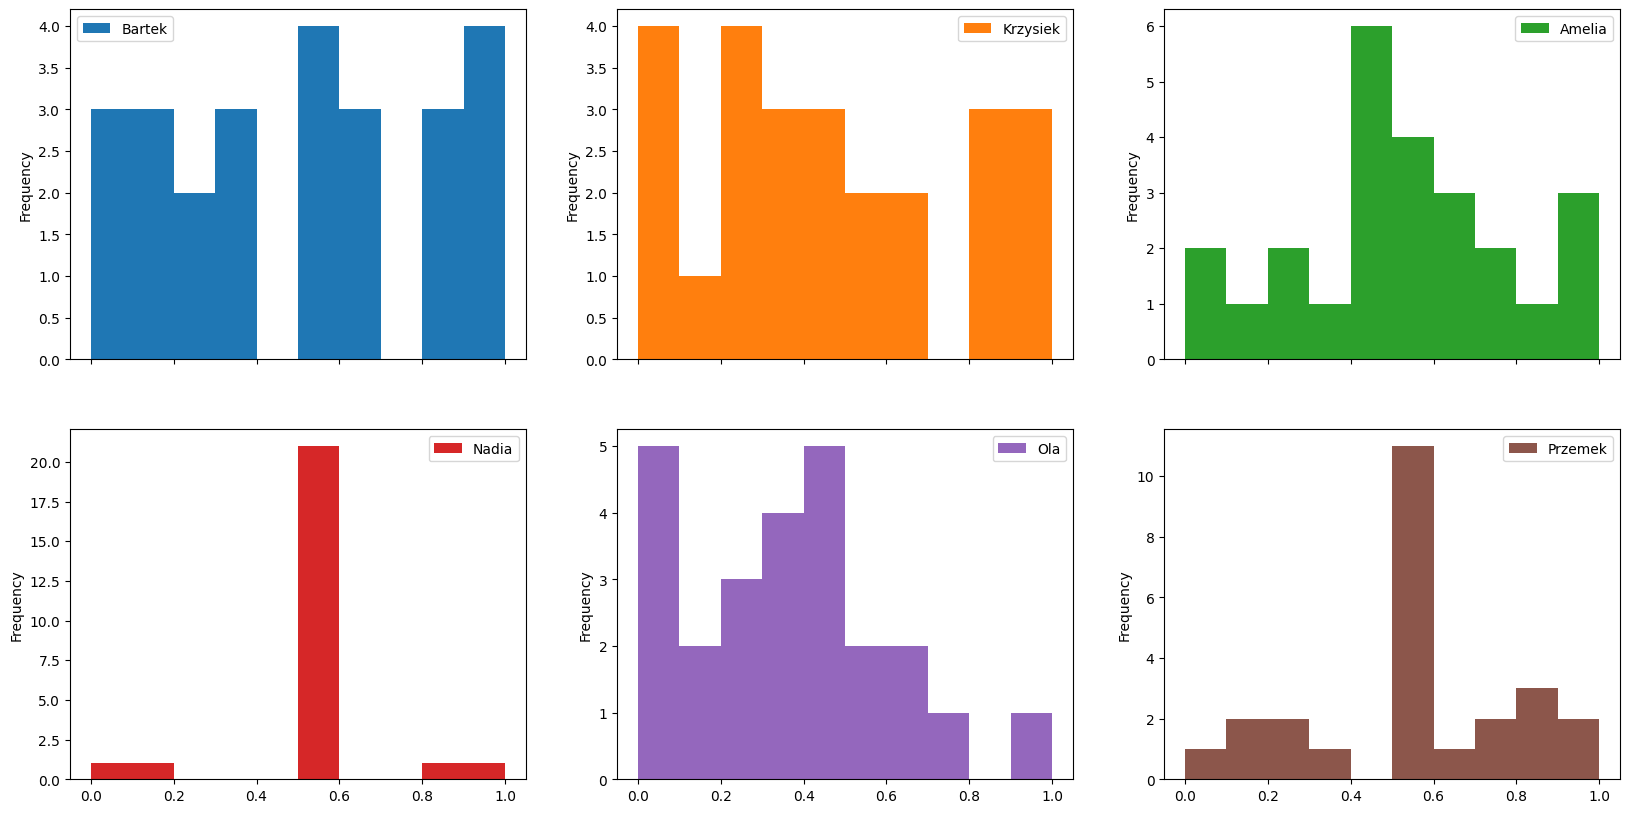

In [182]:
data[cols].plot.hist(layout=(2,3), subplots=True, figsize=(20, 10))

In [183]:
# calculate mean, and create pivot table
data['mean'] = data[cols].agg(['mean'], axis=1)
table = data.pivot_table(values='mean', index=data.GM, columns='T')
table

T,92,94,96,98,100
GM,,,,,
10,0.520870,0.584264,0.444186,0.506350,0.254699
11,0.489499,0.681634,0.605768,0.279743,0.312981
12,0.291880,0.577441,0.307340,0.465179,0.516336
13,0.518679,0.550167,0.510094,0.308373,0.619286
14,0.549094,0.791624,0.683290,0.497126,0.356866


C:\Users\kbols\AppData\Local\Temp\ipykernel_1368\2686185016.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrame.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table.aggregate(sum, axis=1).plot.bar()


<Axes: xlabel='GM'>

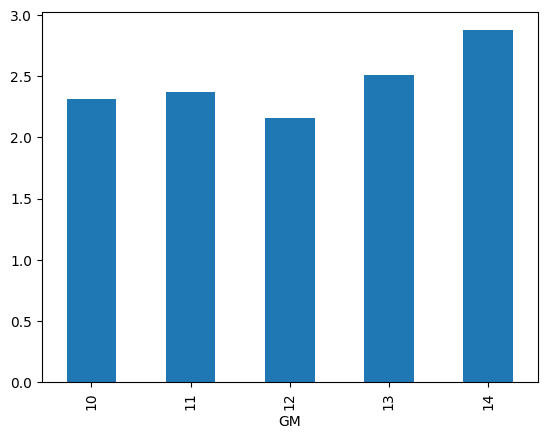

In [184]:
table.aggregate(sum, axis=1).plot.bar()

C:\Users\kbols\AppData\Local\Temp\ipykernel_1368\435108671.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrame.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table.aggregate(sum, axis=0).plot.bar()


<Axes: xlabel='T'>

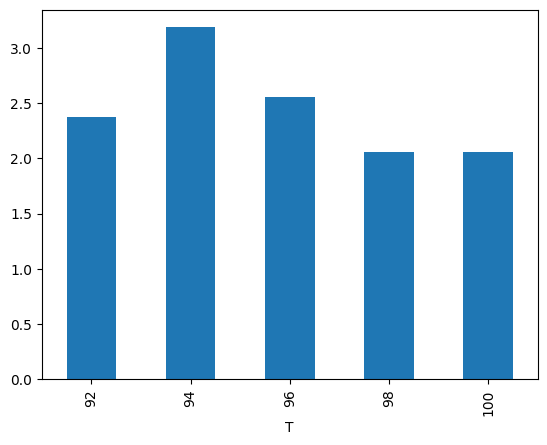

In [185]:
table.aggregate(sum, axis=0).plot.bar()

In [186]:
# create data to plot
Z = table.to_numpy()
Y = table.index.to_numpy()
X = table.columns.to_numpy()

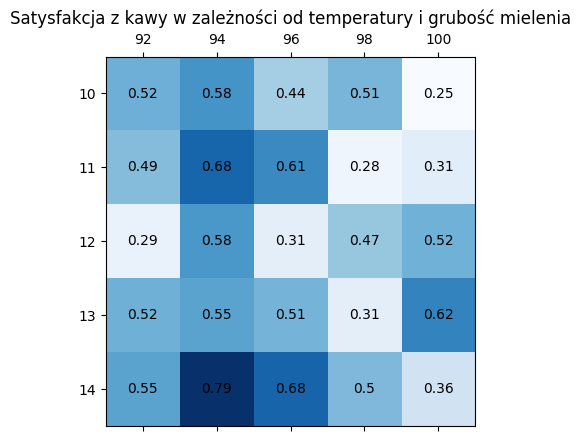

In [187]:
# Display table with colormap
fig3, ax3 = plt.subplots()
ax3.matshow(Z, cmap=plt.cm.Blues)
ax3.set_title("Satysfakcja z kawy w zależności od temperatury i grubość mielenia")
ax3.set_xticks([i for i in range(len(X))])
ax3.set_xticklabels(X)
ax3.set_yticks([i for i in range(len(Y))])
ax3.set_yticklabels(Y)

for i in range(len(Z[0])):
    for j in range(len(Z)):
        c = round(Z[j,i], 2)
        ax3.text(i, j, c, va='center', ha='center')